In [ ]:
import sciann as sn;
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
from sciann.utils.math import diff, sign, sin;

---------------------- SCIANN 0.6.8.6 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.3 
Python Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)] 



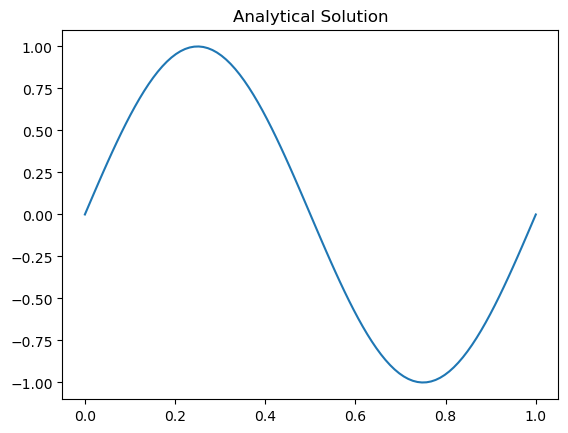

In [ ]:
x_discrete=np.linspace(0, 1, 100) 
u_analytical= np.sin(2*np.pi*x_discrete)
plt.figure
plt.title('Analytical Solution')
plt.plot(x_discrete, u_analytical);

In [ ]:
x = sn.Variable('x')
u= sn.Functional('u', [x], 4*[20], 'tanh')

In [ ]:
EA=1
L=1
p= 4*((np.pi)**2)*(sin(2*np.pi*x))

In [ ]:
L1= sn.rename(diff(u, x, order=2)+p, 'L1')

In [ ]:
tolerance=0.0000001
L2= (1-sign(x-(0+tolerance)))*u
L3= (1+sign(x-(1-tolerance)))*u

In [ ]:
m= sn.SciModel([x], [L1, L2, L3], loss_func='mse', optimizer='adam')

In [ ]:
h= m.train([x_discrete], ['zeros', 'zeros', 'zeros'], epochs=2500, learning_rate=0.002, verbose=1)

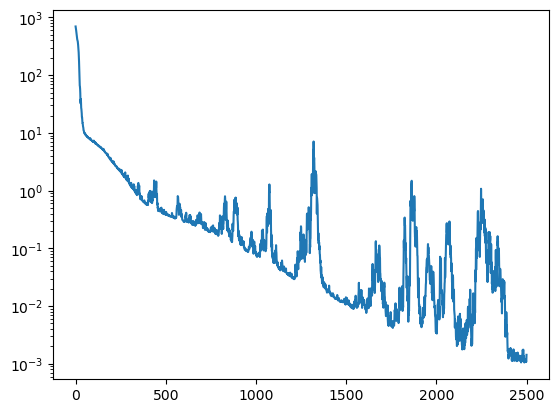

In [ ]:
plt.semilogy(h.history['loss'])

In [ ]:
u_pred = u.eval(x_discrete)

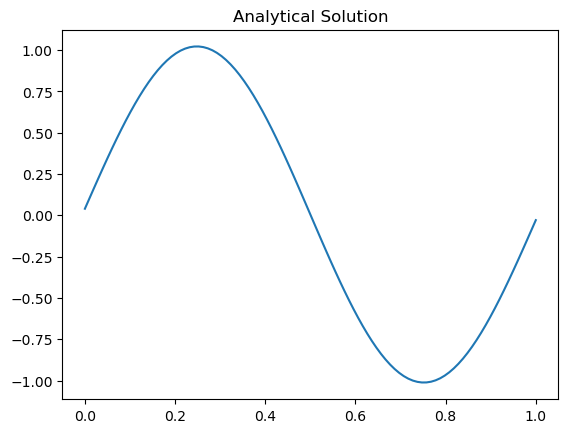

In [ ]:
plt.figure
plt.title('Analytical Solution')
plt.plot(x_discrete, u_pred);